# Exploratory Data Analysis

## Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Wrangling

In [2]:
data = pd.read_csv("student-por.csv")  # reading the csv file with the data

print(data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(data.shape[1]))

(649, 33)
rows = 649
columns = 33


In [3]:
data.head(10)  # to get a glimpse of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [4]:
data.tail(10)  # to get a glimpse of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
639,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
640,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0
641,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,0,14,17,15
642,MS,F,17,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0,6,9,11
643,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,4,7,9,10
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [5]:
data.sample()  # returns a sample random row from the data frame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
483,MS,F,16,R,GT3,T,2,2,other,other,...,3,4,5,1,2,1,1,9,10,11


In [6]:
data.info()  # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
data.describe(
)  # to view a summary of the descriptive statistics of the numerical attributes in the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Cleaning Data

In [8]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [9]:
data.duplicated().describe(
)  # one unique value of false means no duplicate value

count       649
unique        1
top       False
freq        649
dtype: object

In [10]:
# data.drop_duplicates() # we do not have duplicate values in our dataset as proved above

# Drops rows with null or missing values # we do not have null values
data.dropna()  # dropping missing values, if present in dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [11]:
data.rename(columns={
    'famsize': 'fam_size',
    'Pstatus': 'parent_status',
    'Medu': 'mom_edu',
    'Fedu': 'dad_edu',
    'Mjob': 'mom_job',
    'Fjob': 'dad_job',
    'schoolsup': 'school_support',
    'famsup': 'fam_support',
    'paid': 'paid_class',
    'higher': 'higher_edu',
    'romantic': 'romantic_relations',
    'famrel': 'fam_relations',
    'goout': 'outings',
    'Dalc': 'workday_alcohol',
    'Walc': 'weekend_alcohol'
},
            inplace=True)
# renaming the data columns

### Checking for Outliers or Invalid Data
#### Note: These attributes- mom_edu, dad_edu, traveltime, studytime, famrelations, freetime, outings, workday_alcohol, weekend_alcohol, and health are ordinal data but have been converted to numeric for analysis purposes. We are not checking for outliers but just for invalid values for these attributes. Ordinal values ranging from 1-5 are very low-very high.

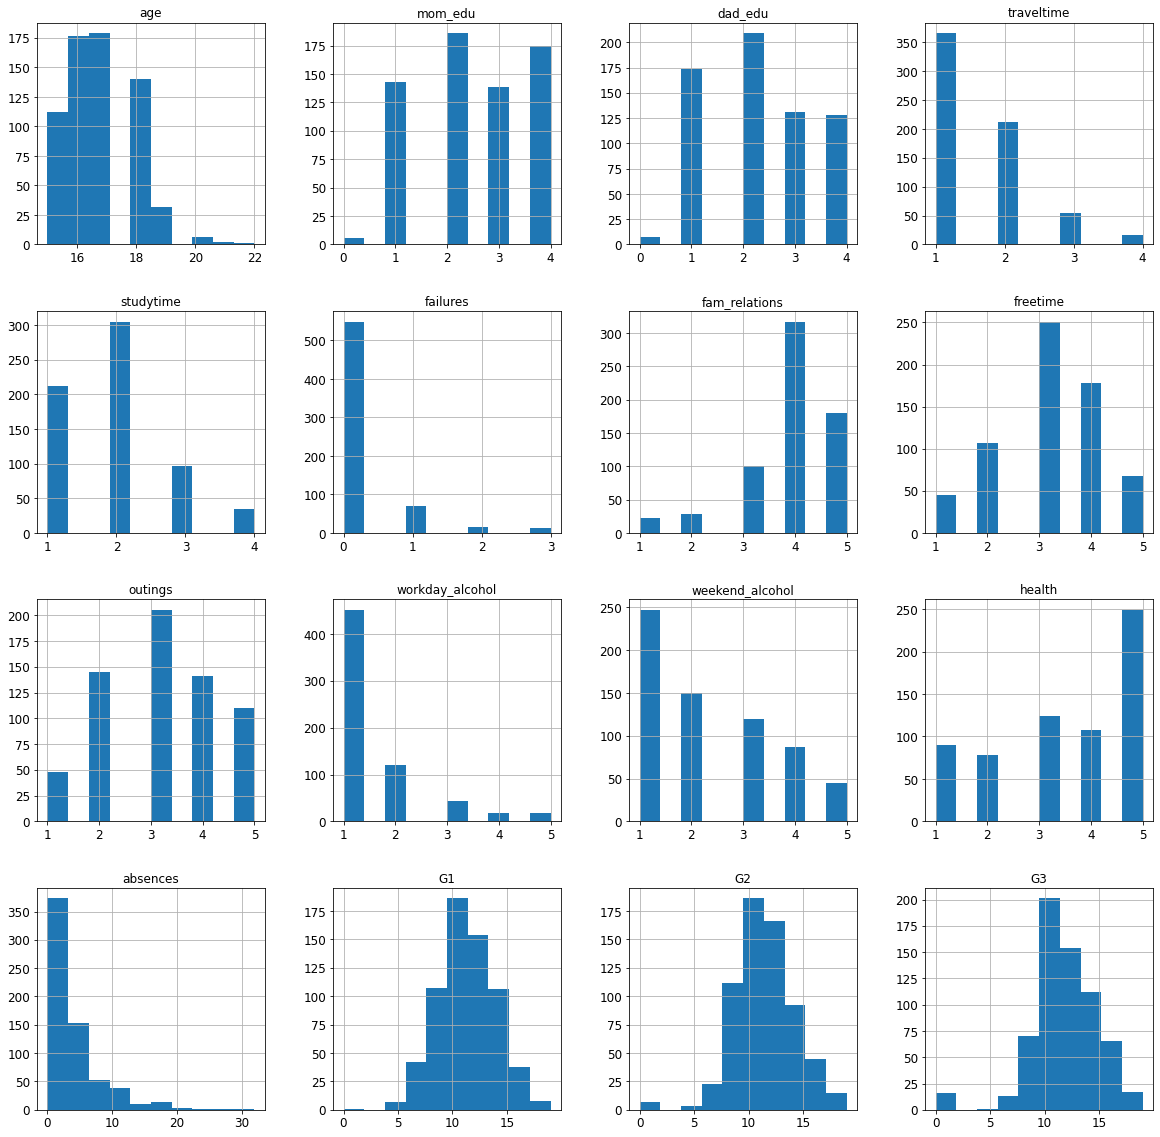

In [12]:
# To plot a histogram for each numerical attribute, aids in checking for nonsensical extreme values (invalid values) in attributes that were converted from ordinal to numeric.
data.hist(figsize=(20, 20))
plt.show()

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
279     GP   M   22       U      GT3             T        3        1   

      mom_job   dad_job  ... fam_relations freetime  outings  workday_alcohol  \
279  services  services  ...             5        4        5                5   

     weekend_alcohol health absences G1 G2 G3  
279                5      1       12  7  8  5  

[1 rows x 33 columns]


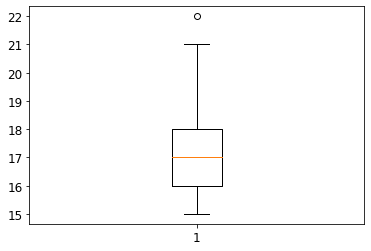

In [13]:
age_Q1 = data["age"].quantile(0.25)
age_Q3 = data["age"].quantile(0.75)
age_IQR = age_Q3 - age_Q1  # Computing IQR

# Data points below the lower fence (Q1-1.5*IQR) and above the upper fence (Q3+1.5*IQR) are considered to be outliers.
age_outliers = data[(data["age"] < (age_Q1 - 1.5 * age_IQR))
                    | (data["age"] > (age_Q3 + 1.5 * age_IQR))]

print(age_outliers)  # to check out the outliers

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR, removing outliers from the dataset
# data = data[(data["age"]>=(age_Q1 - 1.5 * age_IQR)) & (data["age"]<=(age_Q3 + 1.5 * age_IQR))]
# We do not want the filter the data as we would like to consider the only person of 22 years of age for possible interesting correlations.
# We might want to reconsider our decision at a later point if required.

# Creating boxplot, dots representing data above the upper fence or below the lower fence represent outliers
age_plot = plt.boxplot(data["age"])
plt.show(age_plot)

In [14]:
# Data points above mean + 3*std and below mean + 3*std are considered outliers
upper_G1 = data["G1"].mean() + 3 * data["G1"].std()
lower_G1 = data["G1"].mean() - 3 * data["G1"].std()
print(upper_G1)
print(lower_G1)
data_1 = data[(data["G1"] < upper_G1) & (data["G1"] > lower_G1)]
print(data_1.shape)

upper_G2 = data_1["G2"].mean() + 3 * data_1["G2"].std()
lower_G2 = data_1["G2"].mean() - 3 * data_1["G2"].std()
print(upper_G2)
print(lower_G2)
data_2 = data_1[(data_1["G2"] < upper_G2) & (data_1["G2"] > lower_G2)]
print(data_2.shape)

# Using z-scores to find outliers, all data points with z-score above 3 and below -3 are said to be outliers
data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()
print(data_2[data_2["zscore"] > 3].shape)
# 9 values so they have been removed
print(data_2[data_2["zscore"] < -3].shape)

# new dataframe with no outliers
data_3 = data_2[(data_2['zscore'] > -3) & (data_2['zscore'] < 3)]

19.63487088610952
3.1632801154313093
(648, 33)
20.318397172480005
2.8235781361619683
(641, 33)
(0, 34)
(9, 34)


C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\3805946291.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()


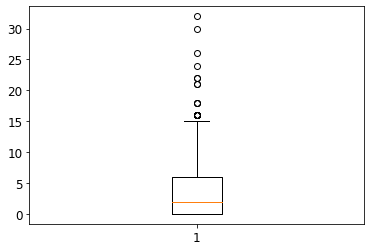

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
40      GP   F   16       U      LE3             T        2        2   
103     GP   F   15       U      GT3             T        3        2   
150     GP   F   15       U      GT3             A        3        3   
155     GP   M   17       U      GT3             T        2        1   
161     GP   M   16       U      GT3             T        4        4   
197     GP   F   17       U      LE3             T        3        3   
206     GP   M   17       U      GT3             T        1        2   
211     GP   M   16       R      LE3             T        3        3   
212     GP   F   17       U      GT3             T        4        4   
217     GP   F   17       R      GT3             T        2        2   
230     GP   F   17       U      GT3             T        4        3   
253     GP   F   18       U      LE3             A        2        4   
254     GP   F   18       U      LE3             T        2     

In [15]:
# Creating boxplots to check for outliers visually, dots representing data above the upper fence or below the lower fence represent outliers as explained already
absences_plot = plt.boxplot(data_3["absences"])
plt.show()

absences_Q1 = data_3["absences"].quantile(0.25)
absences_Q3 = data_3["absences"].quantile(0.75)
absences_IQR = absences_Q3 - absences_Q1  # Computing IQR

absences_outliers = data_3[(data_3["absences"] <
                           (absences_Q1 - 1.5 * absences_IQR))
                          | (data_3["absences"] >
                             (absences_Q3 + 1.5 * absences_IQR))]

print(absences_outliers)  # to check out the outliers

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR, making another dataset without outliers, to resuse outliers data in analysis if required
data4 = data_3[(data_3["absences"] >= (absences_Q1 - 1.5 * absences_IQR))
               & (data_3["absences"] <= (absences_Q3 + 1.5 * absences_IQR))]

In [16]:
print("For studytime")
# counts the occurences of values of each unique value in the column 'studytime'
print(data4['studytime'].value_counts())
# counts the occurences of each unique value in the column 'studytime'
print(data4['studytime'].value_counts().count())

print("For freetime")
# counts the occurences of values of each unique value in the column 'freetime'
print(data4['freetime'].value_counts())
# counts the occurences of each unique value in the column 'freetime'
print(data4['freetime'].value_counts().count())

print("\nFor failures-")
# counts the occurences of values of each unique value in the column 'failures'
print(data4['failures'].value_counts())
# counts the occurences of each unique value in the column 'failures'
print(data4['failures'].value_counts().count())

For studytime
2    284
1    195
3     97
4     35
Name: studytime, dtype: int64
4
For freetime
3    233
4    170
2    102
5     61
1     45
Name: freetime, dtype: int64
5

For failures-
0    527
1     57
2     14
3     13
Name: failures, dtype: int64
4


In [17]:
# counts the occurences of values of each unique value in the column 'health'
print(data4['health'].value_counts())

# counts the occurences of values of each unique value in the column 'parent_status'- "T" - living together or "A" - apart
print(data4['parent_status'].value_counts())

5    234
3    115
4    104
1     85
2     73
Name: health, dtype: int64
T    540
A     71
Name: parent_status, dtype: int64


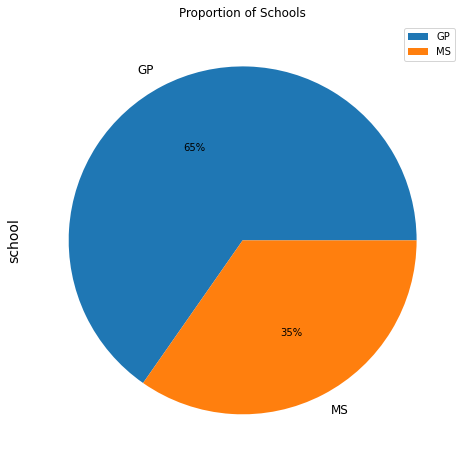

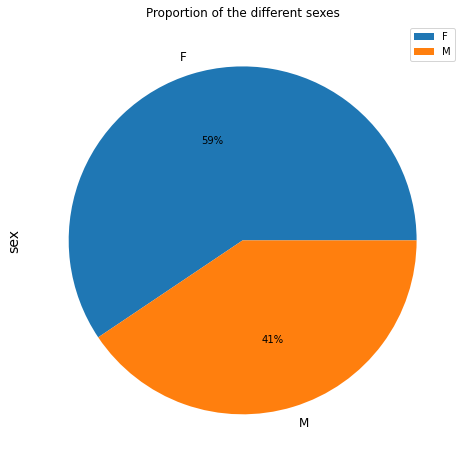

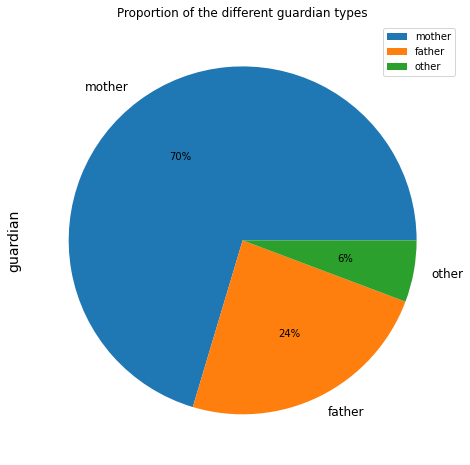

In [18]:
# Shows the proportion of schools mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10, 8))
data4.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of Schools')
plt.legend()

# Shows the proportion of sexes mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different sexes')
plt.legend()

# Shows the proportion of guardians types; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.guardian.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different guardian types')
plt.legend()

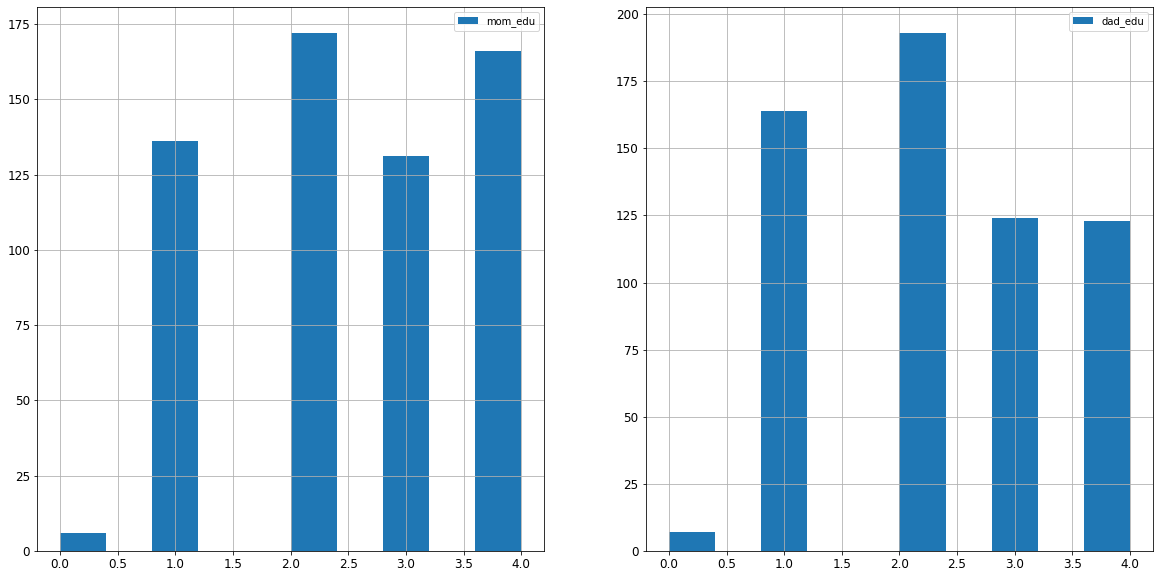

In [19]:
# To plot a histogram for visualizing and comparing mother's and father's education
fig, axes = plt.subplots(1, 2)
data4["mom_edu"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_edu"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

In [20]:
# counts the occurences of values of each unique value in the column 'mom_job'
data4['mom_job'].value_counts()
# counts the occurences of values of each unique value in the column 'dad_job'
data4['dad_job'].value_counts()

other       348
services    169
at_home      39
teacher      32
health       23
Name: dad_job, dtype: int64

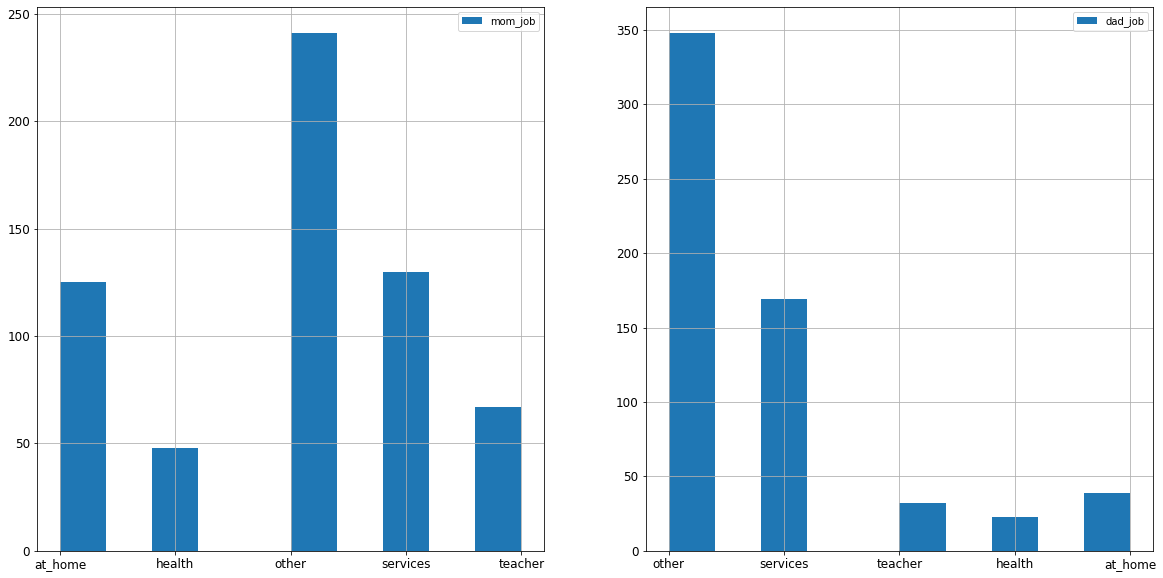

In [21]:
# To visualize the values of the mother's job and father's jobs
fig, axes = plt.subplots(1, 2)
data4["mom_job"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_job"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='address'>

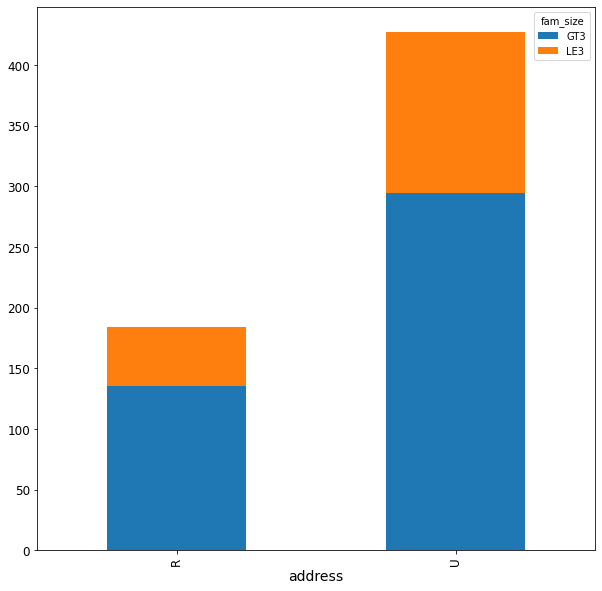

In [22]:
# Reference- https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
# To visualize the relation between family size and the type of the address (urban(U) or rural(R))
pd.crosstab(data4['address'],data4['fam_size']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='fam_relations'>

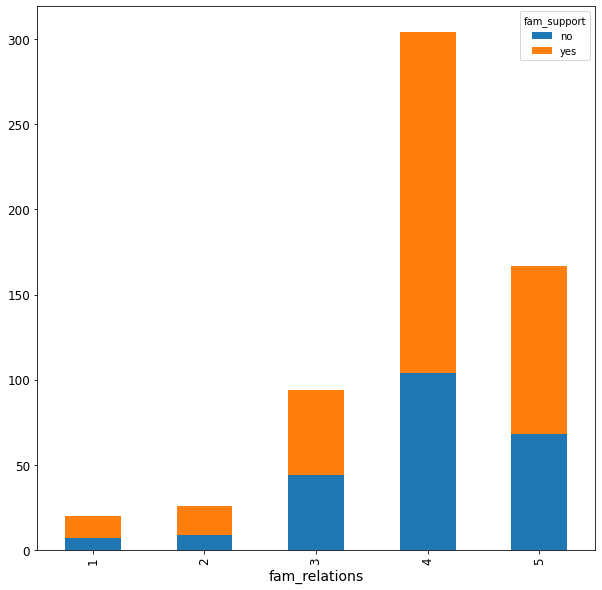

In [23]:
# To visualize the relation between level of family relation and the support from family
pd.crosstab(data4['fam_relations'],data4['fam_support']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='reason'>

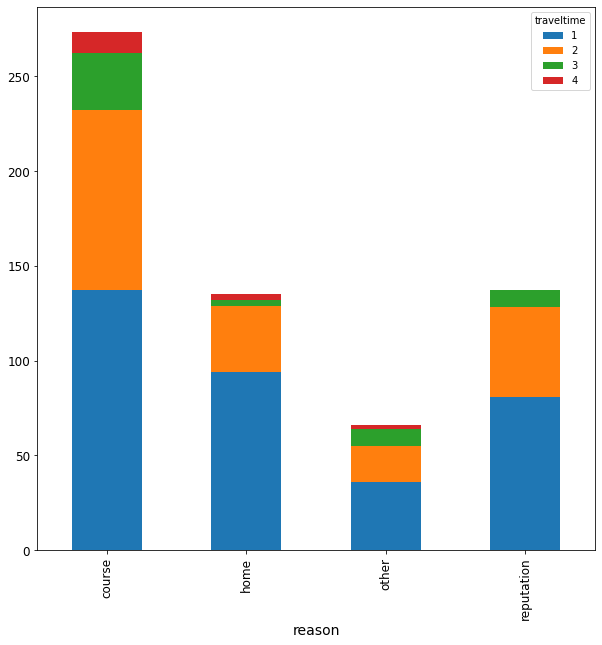

In [24]:
# To outline the relation between the reason for choosing the school v/s the travel time
pd.crosstab(data4['reason'],data4['traveltime']).plot.bar(stacked=True, figsize=(10,10))

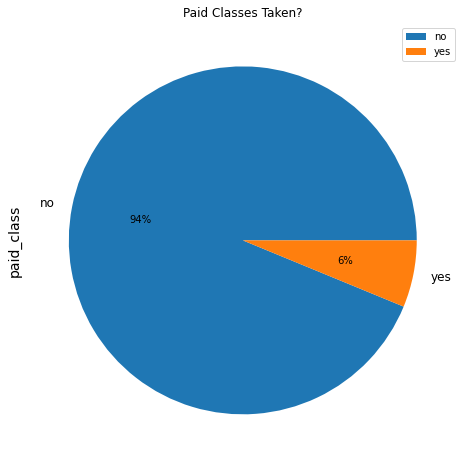

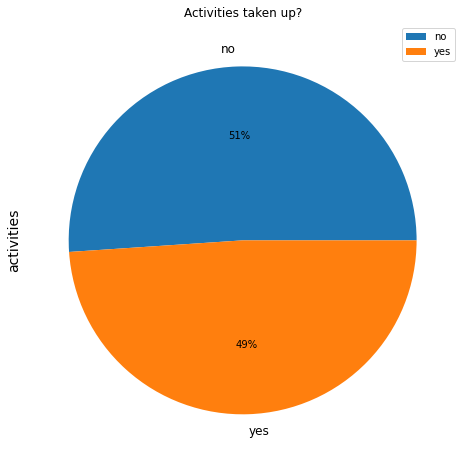

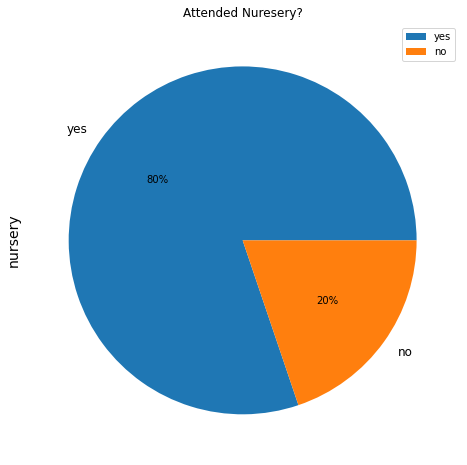

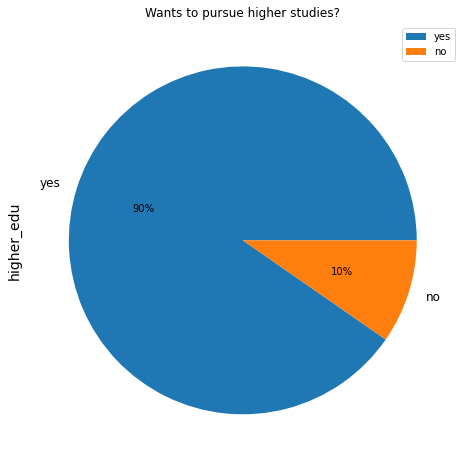

In [25]:
# To have pie charts with some attributes taking binary values
# paid classes for Math or Portuguese
plt.figure(figsize=(10, 8))
data4.paid_class.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Paid Classes Taken?')
plt.legend()

# takes part in other activities 
plt.figure(figsize=(10, 8))
data4.activities.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Activities taken up?')
plt.legend()

# attended nursery school (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.nursery.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Attended Nuresery?')
plt.legend()

# higher - wants to take higher education (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.higher_edu.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wants to pursue higher studies?')
plt.legend()


In [26]:
# counts the occurences of values of each unique value in the column 'internet'- has access to or not
print(data4['internet'].value_counts())

# counts the occurences of values of each unique value in the column 'romantic_relations'- if they are in a romantic relationship or not
print(data4['romantic_relations'].value_counts())

# counts the occurences of values of each unique value in the column 'outings'- frequency of going out with friends
print(data4['outings'].value_counts())

yes    469
no     142
Name: internet, dtype: int64
no     392
yes    219
Name: romantic_relations, dtype: int64
3    196
2    140
4    133
5    100
1     42
Name: outings, dtype: int64


<AxesSubplot:xlabel='weekend_alcohol'>

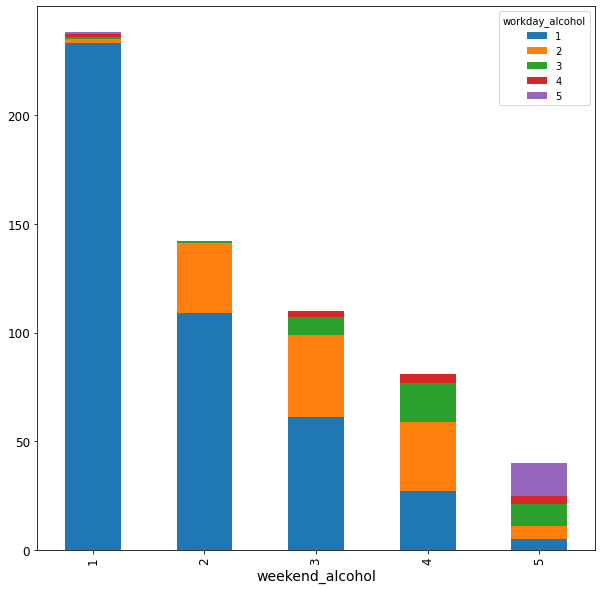

In [27]:
# To showcase the weekday and weekend alcohol consumption
pd.crosstab(data4['weekend_alcohol'],data4['workday_alcohol']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='absences', ylabel='G3'>

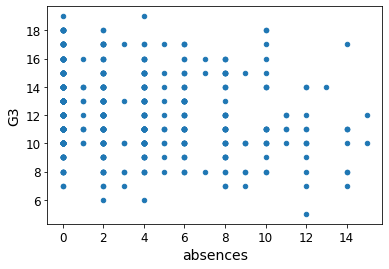

In [28]:
# To find a possible relationship between absences and final grade, before calculating the correlation matrix
data4.plot(kind="scatter", x="absences", y="G3")

## Feature Engineering

In [29]:
data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade
data4.head()

C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\3837693695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade


,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,outings,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3,zscore,avg_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,-0.345841,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,-0.012481,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,0.654237,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,0.320878,12.333333
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,6,12,12,13,0.320878,12.333333


In [30]:
data4.sort_values(by=['avg_grade'])
bin_labels_5 = ['E', 'D', 'C', 'B', 'A']
data4['final_grade'] = pd.cut(x = data4['avg_grade'],
                              bins=[0, 11, 13, 15, 17, 20],
                              labels=bin_labels_5)
data4.head()

C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\2023745238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['final_grade'] = pd.cut(x = data4['avg_grade'],


,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3,zscore,avg_grade,final_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,-0.345841,10.333333,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,-0.012481,12.333333,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,0.654237,14.000000,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,0.320878,12.333333,D
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,6,12,12,13,0.320878,12.333333,D


## Correlations

In [31]:
data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations

C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\1468635189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations


In [32]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# df = data4.select_dtypes(include=numerics)
# df.columns

# df["parent_edu"] = (df['mom_edu']+df['dad_edu'])/2 # to add an extra attribute
# df["alcohol_consump"] = (df['workday_alcohol']+df['weekend_alcohol'])/2 # to add an extra attribute

In [33]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])

C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\3492055340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns] = ordinal_encoder.fit_transform(data4[columns])


In [34]:
data4.head()
df = data4.copy()

In [35]:
df.drop(['G1','G2','G3','avg_grade'], axis = 1, inplace = True)
df.head()

,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,internet,romantic_relations,fam_relations,freetime,outings,workday_alcohol,weekend_alcohol,health,absences,final_grade
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,1.0,0.0,5,3,3,1,1,3,2,E
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,1.0,0.0,4,3,2,2,3,3,6,D
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,1.0,1.0,3,2,2,1,1,5,0,C
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,0.0,0.0,4,3,2,1,2,5,0,D
5,0.0,1.0,16,1.0,1.0,1.0,4,3,3.0,2.0,...,1.0,0.0,5,4,2,1,2,5,6,D


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [37]:
df.index = data4.index
df['final_grade'] = data4['final_grade']
df.head()

,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,internet,romantic_relations,fam_relations,freetime,outings,workday_alcohol,weekend_alcohol,health,absences,final_grade
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,1.0,0.0,5,3,3,1,1,3,2,E
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,1.0,0.0,4,3,2,2,3,3,6,D
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,1.0,1.0,3,2,2,1,1,5,0,C
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,0.0,0.0,4,3,2,1,2,5,0,D
5,0.0,1.0,16,1.0,1.0,1.0,4,3,3.0,2.0,...,1.0,0.0,5,4,2,1,2,5,6,D


In [38]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['A'],1)
df1['final_grade'] = df1['final_grade'].replace(['B', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
studytime             0.110850
mom_edu               0.101036
age                   0.068041
reason                0.062210
higher_edu            0.058570
address               0.055941
dad_job               0.053935
mom_job               0.038361
parent_status         0.035538
internet              0.031604
fam_size              0.007672
dad_edu               0.000251
health               -0.001506
fam_relations        -0.007877
workday_alcohol      -0.009388
school               -0.011736
weekend_alcohol      -0.013230
fam_support          -0.015263
school_support       -0.031232
outings              -0.035693
activities           -0.043343
freetime             -0.045681
paid_class           -0.046135
traveltime           -0.046965
sex                  -0.052072
failures             -0.062794
guardian             -0.065210
romantic_relations   -0.074917
nursery              -0.076595
absences             -0.086915
Name: final_grade, dtype: float64

<AxesSubplot:>

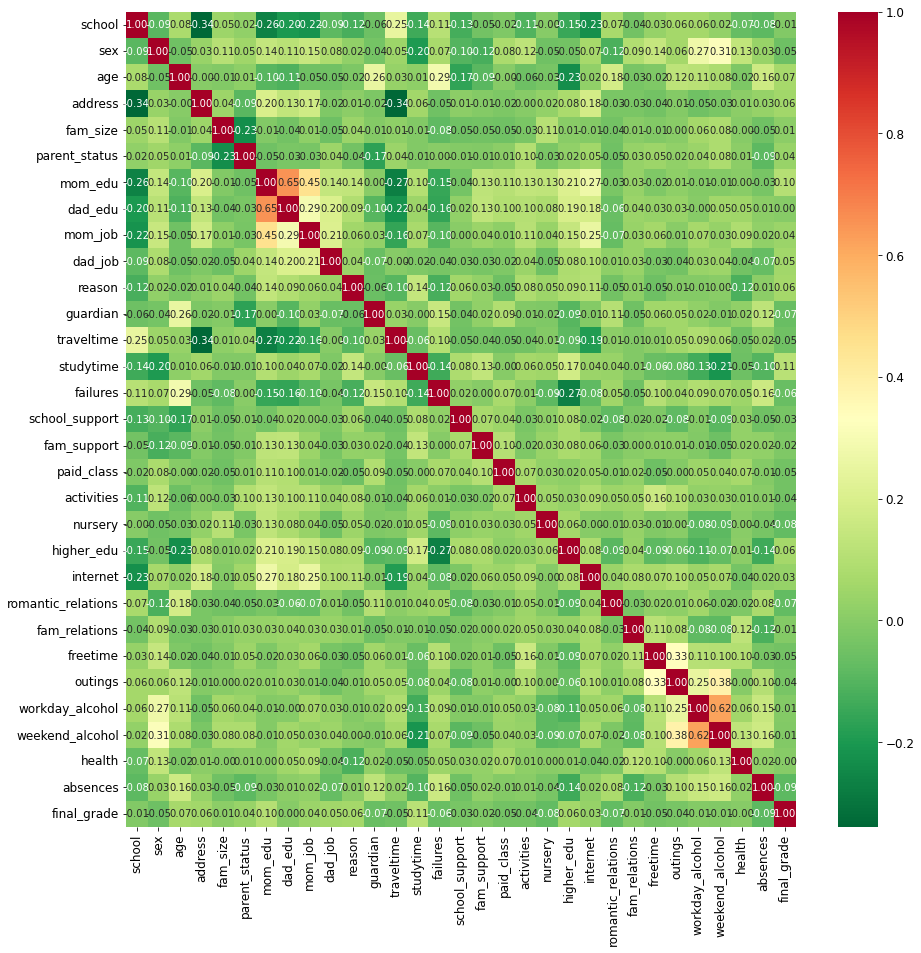

In [39]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [40]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['B'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
mom_edu               0.166827
dad_edu               0.138489
studytime             0.113783
higher_edu            0.100757
reason                0.092992
fam_relations         0.076416
dad_job               0.071685
nursery               0.065601
mom_job               0.065254
activities            0.047273
age                   0.042847
internet              0.031906
romantic_relations    0.024292
fam_support           0.013472
address               0.012178
fam_size              0.003814
guardian             -0.004211
outings              -0.022341
paid_class           -0.031211
parent_status        -0.033410
sex                  -0.041591
freetime             -0.047826
school               -0.053623
traveltime           -0.061736
health               -0.062528
absences             -0.065018
workday_alcohol      -0.082990
weekend_alcohol      -0.092853
school_support       -0.106336
failures             -0.108024
Name: final_grade, dtype: float64

<AxesSubplot:>

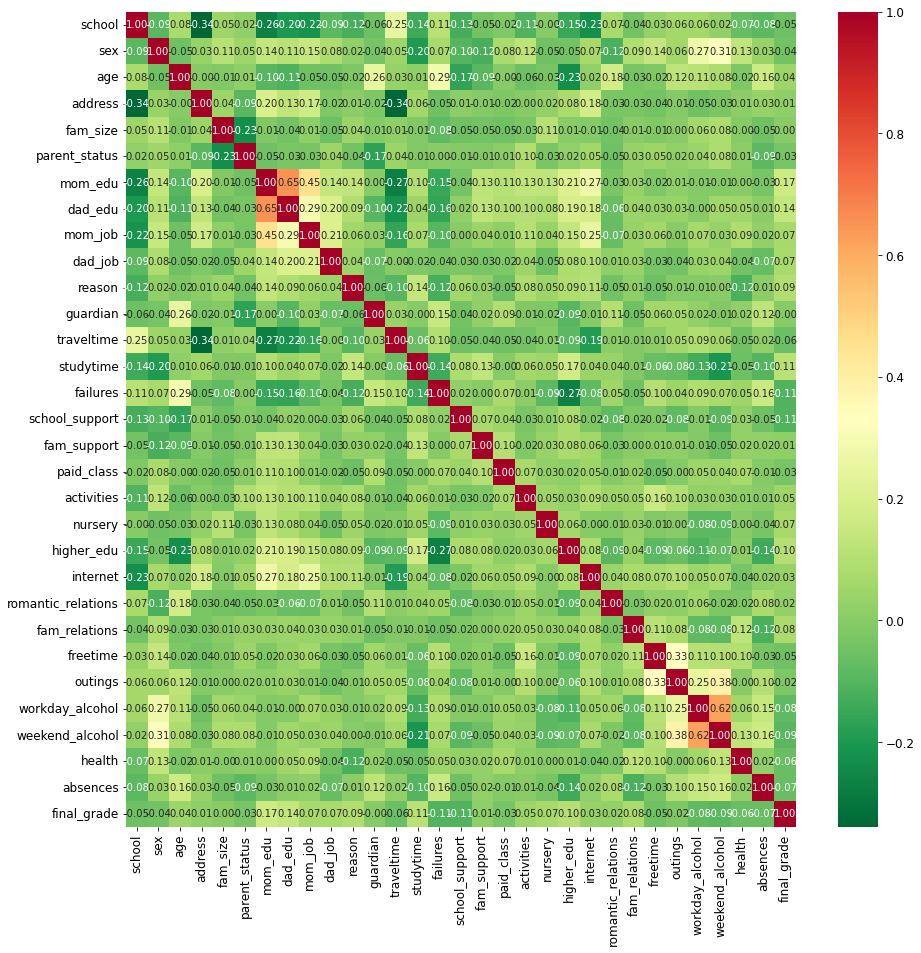

In [41]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [42]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['C'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'B', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.135150
mom_edu               0.122770
mom_job               0.117867
studytime             0.117668
dad_edu               0.104286
internet              0.098597
nursery               0.097521
address               0.084053
activities            0.070274
reason                0.048184
dad_job               0.030807
freetime              0.014964
fam_relations        -0.001074
fam_size             -0.003796
guardian             -0.006260
romantic_relations   -0.008954
parent_status        -0.009205
outings              -0.033211
fam_support          -0.033408
sex                  -0.053026
paid_class           -0.064293
absences             -0.070028
health               -0.072015
school_support       -0.073968
age                  -0.076271
traveltime           -0.086048
weekend_alcohol      -0.097352
school               -0.116034
workday_alcohol      -0.118555
failures             -0.145656
Name: final_grade, dtype: float64

<AxesSubplot:>

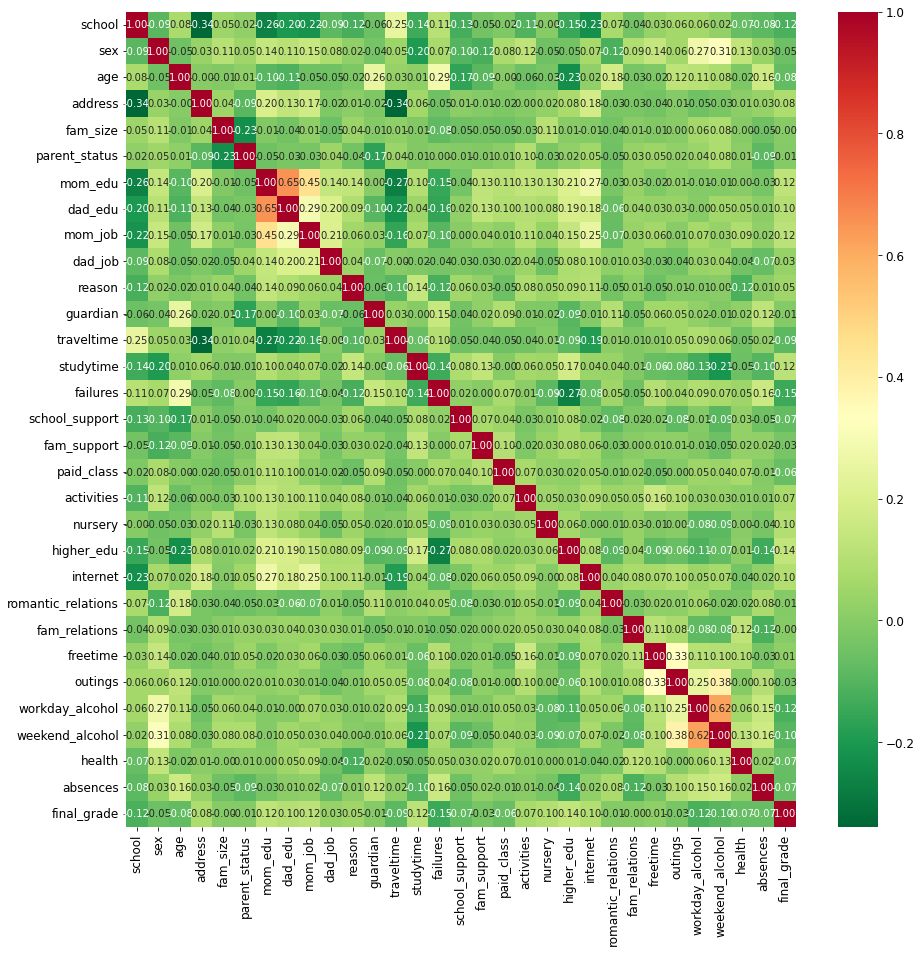

In [43]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [44]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['D'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'B', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.152606
address               0.110810
school_support        0.095187
paid_class            0.068015
mom_job               0.063002
fam_support           0.054057
dad_edu               0.049262
fam_relations         0.041886
activities            0.038777
internet              0.037047
mom_edu               0.028502
reason                0.025822
health                0.017724
studytime             0.007603
nursery               0.004298
dad_job               0.002092
fam_size             -0.008525
romantic_relations   -0.019643
parent_status        -0.026964
sex                  -0.034242
weekend_alcohol      -0.039017
outings              -0.044645
workday_alcohol      -0.057510
absences             -0.070543
freetime             -0.075141
traveltime           -0.076119
guardian             -0.080570
age                  -0.137878
failures             -0.178821
school               -0.204757
Name: final_grade, dtype: float64

<AxesSubplot:>

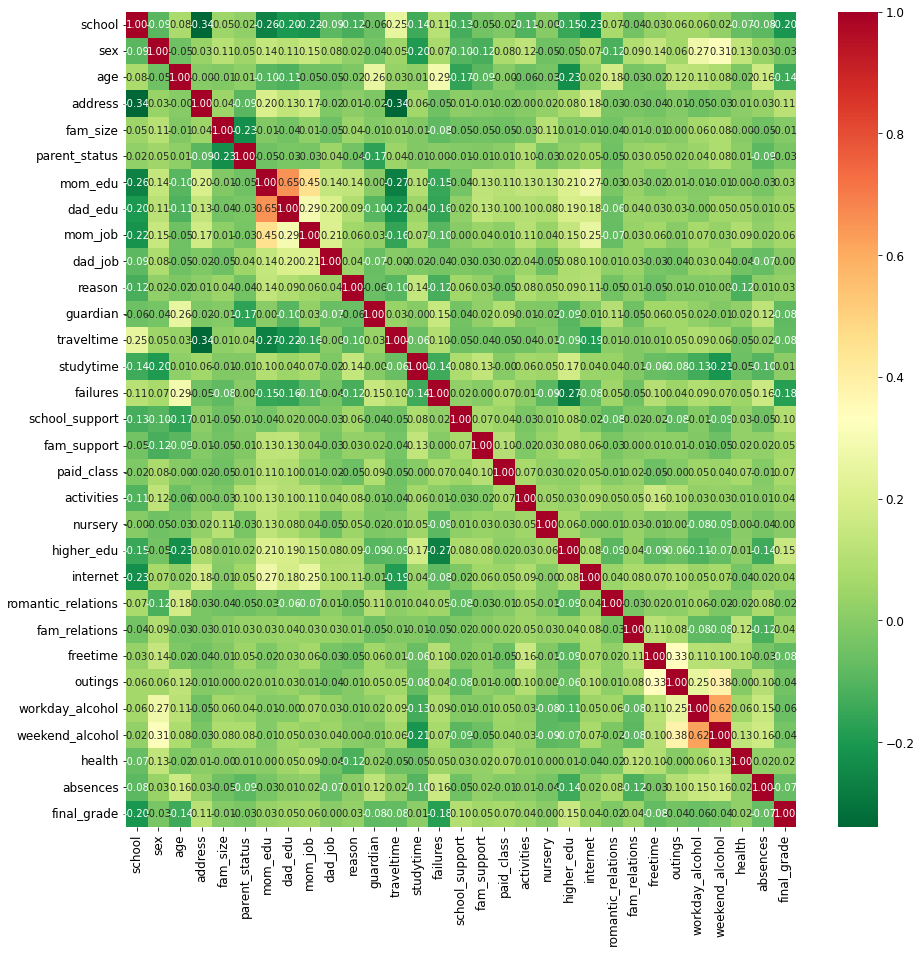

In [45]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [46]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['E'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'B'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
failures              0.356198
school                0.308174
workday_alcohol       0.193000
traveltime            0.186046
absences              0.184628
weekend_alcohol       0.167043
age                   0.134620
sex                   0.113332
guardian              0.102782
freetime              0.099595
outings               0.090902
health                0.075100
school_support        0.041951
parent_status         0.037915
romantic_relations    0.037032
paid_class            0.021629
fam_size              0.005744
fam_support          -0.025582
fam_relations        -0.077661
dad_job              -0.085068
nursery              -0.088862
activities           -0.100407
reason               -0.134786
internet             -0.138026
address              -0.190835
mom_job              -0.197509
studytime            -0.200305
dad_edu              -0.202977
mom_edu              -0.249778
higher_edu           -0.318886
Name: final_grade, dtype: float64

<AxesSubplot:>

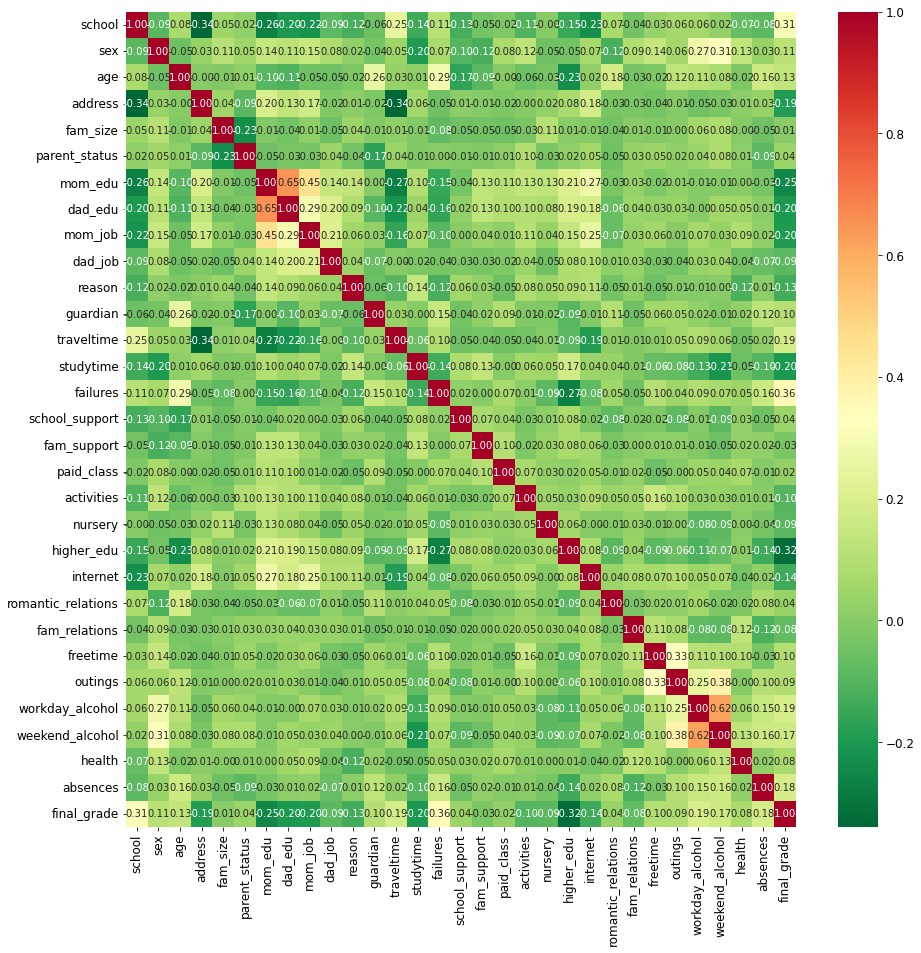

In [47]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [48]:
df_2 = df[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]
df_2.head()

,studytime,mom_edu,dad_edu,higher_edu,address,failures,school
1,2,1,1,1.0,1.0,0,0.0
2,2,1,1,1.0,1.0,0,0.0
3,3,4,2,1.0,1.0,0,0.0
4,2,3,3,1.0,1.0,0,0.0
5,2,4,3,1.0,1.0,0,0.0


In [49]:
df_5 = df[['studytime','mom_edu','dad_edu','age','reason','higher_edu','reason','mom_job','school_support','address','failures','paid_class','workday_alcohol','traveltime','absences']]
df_5.head()

,studytime,mom_edu,dad_edu,age,reason,higher_edu,reason,mom_job,school_support,address,failures,paid_class,workday_alcohol,traveltime,absences
1,2,1,1,17,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,1,1,2
2,2,1,1,15,2.0,1.0,2.0,0.0,1.0,1.0,0,0.0,2,1,6
3,3,4,2,15,1.0,1.0,1.0,1.0,0.0,1.0,0,0.0,1,1,0
4,2,3,3,16,1.0,1.0,1.0,2.0,0.0,1.0,0,0.0,1,1,0
5,2,4,3,16,3.0,1.0,3.0,3.0,0.0,1.0,0,0.0,1,1,6


In [50]:
# df_10 = df[['final_grade','studytime','mom_edu','age','dad_edu','health','fam_relations','workday_alcohol','weekend_alcohol','outings','freetime','traveltime','absences','failures']]
# df_10.head()
df_10 = df[['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','reason','mom_job','dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]
df_10.head()

,studytime,mom_edu,dad_edu,age,sex,guardian,reason,higher_edu,reason,mom_job,...,nursery,school,school_support,failures,address,paid_class,workday_alcohol,weekend_alcohol,traveltime,absences
1,2,1,1,17,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1.0,0.0,1,1,1,2
2,2,1,1,15,0.0,1.0,2.0,1.0,2.0,0.0,...,1.0,0.0,1.0,0,1.0,0.0,2,3,1,6
3,3,4,2,15,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0,1.0,0.0,1,1,1,0
4,2,3,3,16,0.0,0.0,1.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0,1.0,0.0,1,2,1,0
5,2,4,3,16,1.0,1.0,3.0,1.0,3.0,3.0,...,1.0,0.0,0.0,0,1.0,0.0,1,2,1,6


## Prepare Data for Classifier

In [51]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

"""A function that applies transformer pipeline"""

# Use transformer pipline to apply normalization and encode the categorical variables
def transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns):
  transformers = [('numerical', StandardScaler(), numerical_columns), 
                  ('nominal', OneHotEncoder(), nominal_columns),
                  ('binary_ordinal', OrdinalEncoder(), binary_ordinal_columns)]
  transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')
  df = pd.DataFrame(transformer_pipeline.fit_transform(df))
  return df


In [52]:

# 1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47])
new_Y = new_df[47]
new_X, new_Y

           0         1    2    3    4    5    6    7    8    9   ... 38 39 40  \
0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  3  3  1   
1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  3  2  2   
2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2  2  1   
3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3  2  1   
4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  2  1   
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  2  1   
607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  3  4  1   
608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  4  5  3   
610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  1  3   

    41 42  43  44  45      

(           0         1    2    3    4    5    6    7    8    9   ... 37 38 39  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  4  1   
 
     40 41 42 

In [53]:
from sklearn.model_selection import train_test_split

# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)

In [54]:
# 2. Prepare df2 - dataset with top 2 correlated features
df2 = data4[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]

binary_ordinal_columns = ['school', 'address', 'higher_edu'] 

nominal_columns = []

numerical_columns = []

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[34] = le.fit_transform(new_df[34]) #final grade column 


#seperate features from target column
X_df2 = new_df.drop(columns=[34])
Y_df2 = new_df[34]
X_df2, Y_df2

(      0    1    2    3   4    5    6  7  8    9   ... 24 25 26 27 28 29  30  \
 0    0.0  1.0  1.0  0.0  17  0.0  1.0  1  1  0.0  ...  3  3  1  1  3  2   9   
 1    0.0  1.0  1.0  0.0  15  1.0  1.0  1  1  0.0  ...  3  2  2  3  3  6  12   
 2    0.0  1.0  1.0  0.0  15  0.0  1.0  4  2  1.0  ...  2  2  1  1  5  0  14   
 3    0.0  1.0  1.0  0.0  16  0.0  1.0  3  3  2.0  ...  3  2  1  2  5  0  11   
 4    0.0  1.0  1.0  1.0  16  1.0  1.0  4  3  3.0  ...  4  2  1  2  5  6  12   
 ..   ...  ...  ...  ...  ..  ...  ... .. ..  ...  ... .. .. .. .. .. ..  ..   
 606  1.0  0.0  1.0  0.0  19  0.0  1.0  2  3  3.0  ...  4  2  1  2  5  4  10   
 607  1.0  1.0  1.0  0.0  18  1.0  1.0  3  1  4.0  ...  3  4  1  1  1  4  15   
 608  1.0  1.0  1.0  0.0  18  0.0  1.0  1  1  2.0  ...  1  1  1  1  5  6  11   
 609  1.0  1.0  1.0  1.0  17  1.0  1.0  3  1  3.0  ...  4  5  3  4  2  6  10   
 610  1.0  0.0  1.0  1.0  18  1.0  1.0  3  2  3.0  ...  4  1  3  4  5  4  10   
 
      31  32         33  
 0    11  11

In [55]:
# create a test - train split for df2
df2_X_train, df2_X_test, df2_Y_train, df2_Y_test = train_test_split(X_df2, Y_df2, test_size=0.25)

In [56]:
# 3. Prepare df5 - data set with top 5 correlated features
df5 = data4[['studytime','mom_edu','dad_edu','age','reason','higher_edu','mom_job','school_support',
             'address','failures','paid_class','workday_alcohol','traveltime','absences']]

binary_ordinal_columns = ['address', 'school_support', 'paid_class', 'higher_edu'] 

nominal_columns = ['mom_job', 'reason',]

numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

#encode target class
le = LabelEncoder()
new_df[41] = le.fit_transform(new_df[41]) #final grade column 


#seperate features from target column
X_df5 = new_df.drop(columns=[41])
Y_df5 = new_df[41]
X_df5, Y_df5

(           0         1    2    3    4    5    6    7    8    9   ... 31 32 33  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  4  4  1   
 
     34 35 36 

In [57]:
# create a test - train split for df5
df5_X_train, df5_X_test, df5_Y_train, df5_Y_test = train_test_split(X_df5, Y_df5, test_size=0.25)

In [58]:
# 4. Use df 10 dataframe with 10 correlated features
df10 = data4 [['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','mom_job',
               'dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]


binary_ordinal_columns = ['school', 'sex', 'address', 'parent_status', 'school_support',
       'paid_class', 'nursery', 'higher_edu', 'internet'] 

nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

#seperate features from target column
X_df10 = new_df.drop(columns=[47])
Y_df10 = new_df[47]
X_df10, Y_df10

(           0         1    2    3    4    5    6    7    8    9   ... 37 38 39  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  4  1   
 
     40 41 42 

In [59]:
# create a test - train split for df10
df10_X_train, df10_X_test, df10_Y_train, df10_Y_test = train_test_split(X_df10, Y_df10, test_size=0.25)

## Train and Test the Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Create an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier
models = []

modelA = tree.DecisionTreeClassifier()
models.append(modelA)
modelB = RandomForestClassifier()
models.append(modelB)
modelC = KNeighborsClassifier()
models.append(modelC)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)

        print('\n')

    return accuracies  # a list of every models accuracy on the current dataset

##### Generating Evaluation Metrics (Accuracy, Precision, Recall, F1 Scores) and Confusion Matrices

In [62]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)

RESULTS FOR DF -- THE ENTIRE DATASET 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 5  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 26  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 64]]
True positive =  5
False positive =  0
False negative =  0
True negative =  11
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 1.0
Micro Average Precision Score of the classifier RandomForestClassifier() is 1.0
Macro Average Precisi

Accuracy of RandomForestClassifier() is 0.9738562091503268
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.9738562091503268
Macro Average Precision Score of the classifier RandomForestClassifier() is 0.9320346320346321
Micro Average Recall Score of the classifier RandomForestClassifier() is 0.9738562091503268
Macro Average Recall Score of the classifier RandomForestClassifier() is 0.9142857142857143
Micro Average F1 Score of the classifier RandomForestClassifier() is 0.9738562091503268
Macro Average F1 Score of the classifier RandomForestClassifier() is 0.9221978021978021
Confusion Matrix of RandomForestClassifier() is 
 [[ 5  2  0  0  0]
 [ 1 12  1  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 59]]
True positive =  5
False positive =  2
False negative =  1
True negative =  12
Sensitivity Score of the classifier is:  0.7142857142857143
Specificity Score of the classifier is:  0.9230769230769231


Accuracy of KNeighborsClassifier() is 0.875816993

##### Generating Evaluation Metrics (Multi-class ROCAUC Curves)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

    return accuracies  # a list of every models accuracy on the current dataset

RESULTS FOR DF -- THE ENTIRE DATASET 



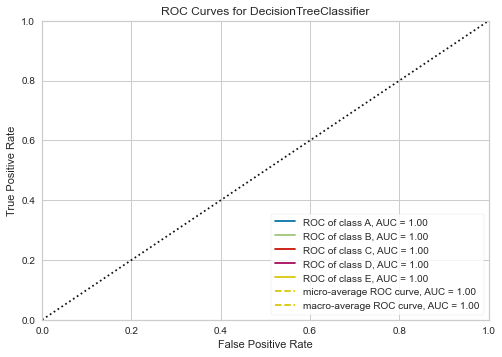

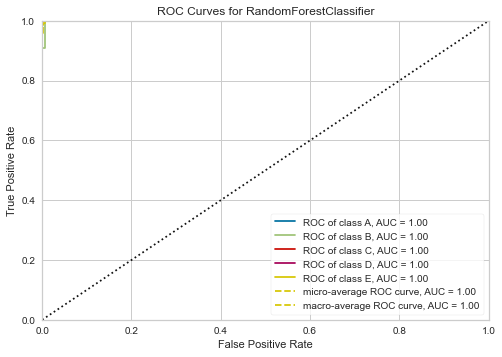

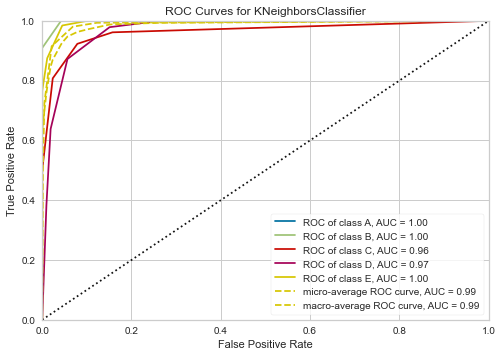

RESULTS FOR DF2 -- TOP2 CORRELATED 



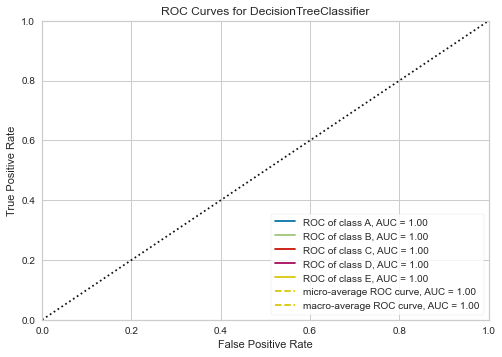

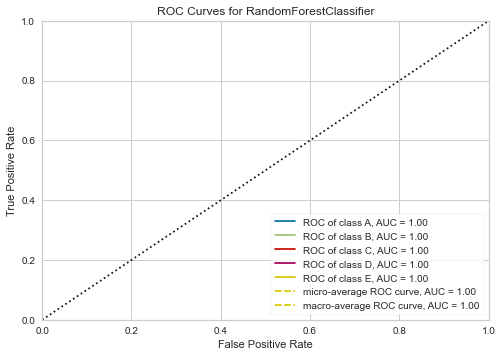

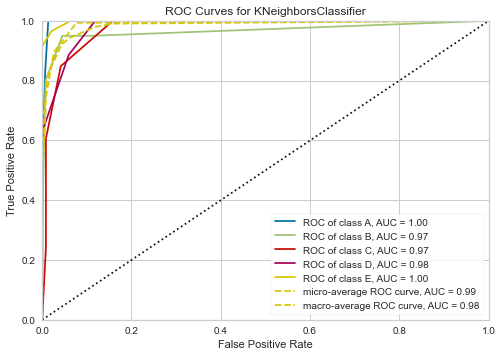

RESULTS FOR DF5 -- TOP 5 CORRELATED 



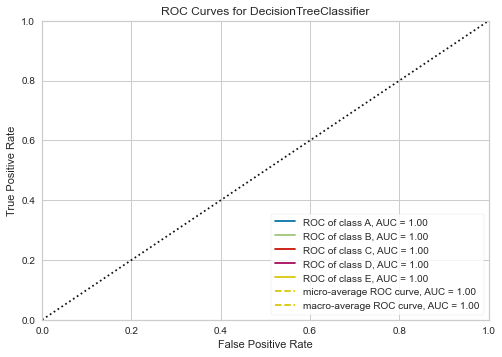

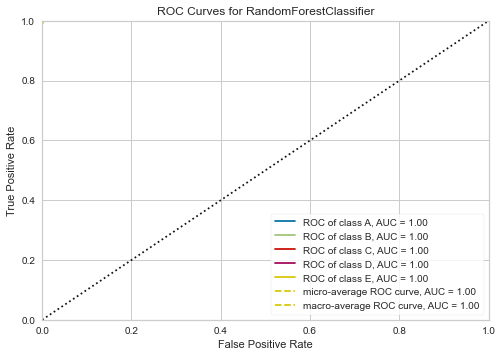

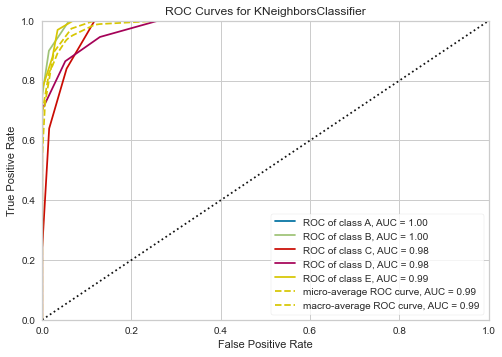

RESULTS FOR DF10 -- TOP 10 CORRELATED 



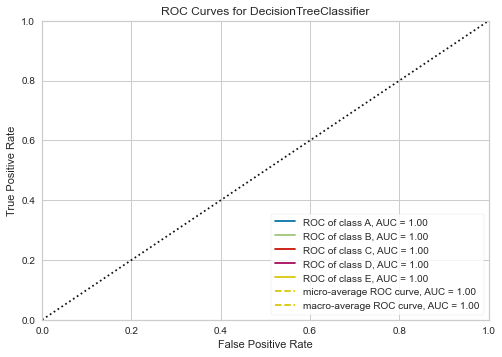

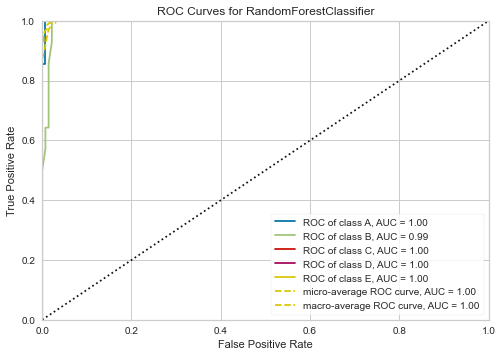

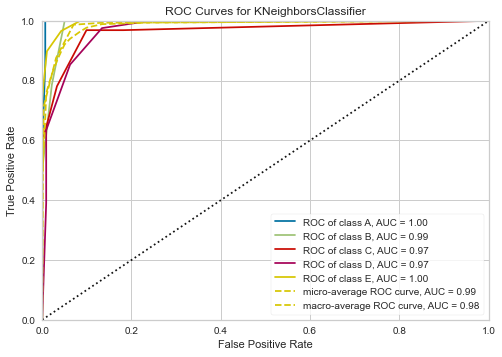

In [64]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)

##### Plotting an Overview/Comparison of Model Performance

In [65]:
# model1_accs = [df_acc[0], df2_acc[0], df5_acc[0], df10_acc[0]]
# model2_accs = [df_acc[1], df2_acc[1], df5_acc[1], df10_acc[1]]
# model3_accs = [df_acc[2], df2_acc[2], df5_acc[2], df10_acc[2]]

# plotdata = pd.DataFrame({
#     "Decision_Tree":model1_accs,
#     "Random_Forest":model2_accs,
#     "KNN":model3_accs
#     }, 
#     index=["df", "df2", "df5", "df10"]
# )
# plotdata.plot(kind="bar")
# plt.title("Test Accuracy of the Models on Different Datasets")
# plt.xlabel("Dataset")
# plt.ylabel("Test Accuracy")

In [66]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])
print(data4)

     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1       0.0  0.0   17      1.0       0.0            1.0        1        1   
2       0.0  0.0   15      1.0       1.0            1.0        1        1   
3       0.0  0.0   15      1.0       0.0            1.0        4        2   
4       0.0  0.0   16      1.0       0.0            1.0        3        3   
5       0.0  1.0   16      1.0       1.0            1.0        4        3   
..      ...  ...  ...      ...       ...            ...      ...      ...   
644     1.0  0.0   19      0.0       0.0            1.0        2        3   
645     1.0  0.0   18      1.0       1.0            1.0        3        1   
646     1.0  0.0   18      1.0       0.0            1.0        1        1   
647     1.0  1.0   17      1.0       1.0            1.0        3        1   
648     1.0  1.0   18      0.0       1.0            1.0        3        2   

     mom_job  dad_job  ...  outings  workday_alcohol  weekend_alcohol  heal

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

new_X = data4.drop(columns=['final_grade'])
new_Y = data4[['final_grade']]
# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)


# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
print(X_train)
print(X_train.columns)

Feature 0: 29.072542
Feature 1: 4.191940
Feature 2: 1.588985
Feature 3: 5.630420
Feature 4: 0.100902
Feature 5: 0.212603
Feature 6: 21.402125
Feature 7: 10.366721
Feature 8: 18.297525
Feature 9: 2.263925
Feature 10: 22.486750
Feature 11: 3.269078
Feature 12: 6.360412
Feature 13: 11.065279
Feature 14: 100.692626
Feature 15: 12.858305
Feature 16: 0.859434
Feature 17: 4.854584
Feature 18: 3.902969
Feature 19: 4.133432
Feature 20: 4.382571
Feature 21: 2.959958
Feature 22: 1.617967
Feature 23: 1.047717
Feature 24: 1.869195
Feature 25: 2.219378
Feature 26: 10.069059
Feature 27: 9.677285
Feature 28: 5.433518
Feature 29: 65.505230
Feature 30: 224.111984
Feature 31: 221.139793
Feature 32: 219.688029
Feature 33: 221.323044
     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
260     0.0  0.0   16      1.0       0.0            1.0        1        2   
483     1.0  0.0   16      0.0       0.0            1.0        2        2   
464     1.0  1.0   16      0.0       0.0      

Results for new df using Chi Classifier -- top3 correlated
     0  1  2
0    3  2  E
1    3  2  D
2    5  3  C
3    5  2  D
4    5  2  D
..  .. .. ..
606  5  3  E
607  1  2  B
608  5  2  E
609  2  1  E
610  5  1  E

[611 rows x 3 columns]


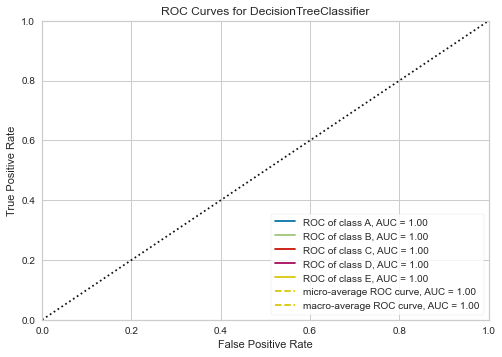

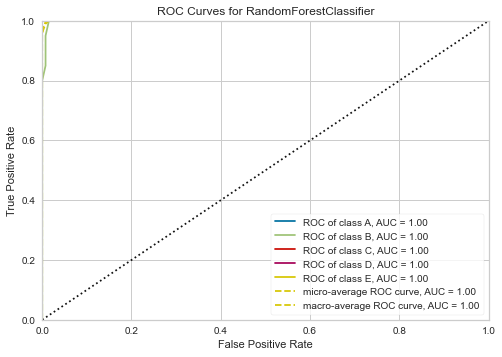

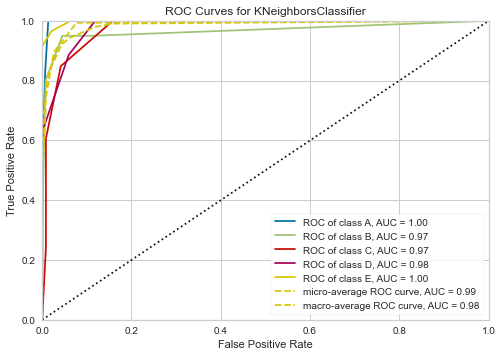

In [68]:
# CHI CLASSIFIER TOP FEATURES
print("Results for new df using Chi Classifier -- top3 correlated")
df2 = data4[['health','studytime','final_grade']]

binary_ordinal_columns = []

nominal_columns = []

numerical_columns = []

new_df = transformer(df2,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)

le = LabelEncoder()
new_df[0] = le.fit_transform(new_df[0])  

#seperate features from target column
X_df10 = new_df.drop(columns=[0])
Y_df10 = new_df[0]
X_df10, Y_df10

df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

## Evaluation using cross-validation

In [69]:
        
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# creating a function to run all the models at once and calculate accuracy, precision, recall and F1 score
def cross_validation_eval(new_X,new_Y):
    for model in models:
        print("%s\n"%model)
        scores = cross_val_score(model, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
        acc = scores.mean()
        print("Accuracy of %s is %s"%(model,acc))
        precision = cross_val_score(model, new_X, new_Y, scoring='precision_macro', cv=10)
        print("Precision of %s is %s"%(model,precision.mean()))
        recall = cross_val_score(model, new_X, new_Y, scoring='recall_macro', cv=10)
        print("Recall of %s is %s"%(model,recall.mean()))
        f1 = cross_val_score(model, new_X, new_Y, scoring='f1_macro', cv=10)
        print("F1 score of %s is %s\n"%(model,f1.mean()))

In [70]:
#1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
# print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47]) # data set with all the attributes except the target attribute
new_Y = new_df[47] # target attribute 



In [71]:
cross_validation_eval(new_X,new_Y)

DecisionTreeClassifier()

Accuracy of DecisionTreeClassifier() is 1.0
Precision of DecisionTreeClassifier() is 1.0
Recall of DecisionTreeClassifier() is 1.0
F1 score of DecisionTreeClassifier() is 1.0

RandomForestClassifier()

Accuracy of RandomForestClassifier() is 0.9885510312004231
Precision of RandomForestClassifier() is 0.9806580086580086
Recall of RandomForestClassifier() is 0.9593333333333334
F1 score of RandomForestClassifier() is 0.9532849791717718

KNeighborsClassifier()

Accuracy of KNeighborsClassifier() is 0.9099947117927023
Precision of KNeighborsClassifier() is 0.9258824072289643
Recall of KNeighborsClassifier() is 0.8928922178039826
F1 score of KNeighborsClassifier() is 0.9024298059185932



### Naive Bayes

In [72]:
# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB(alpha = 1.0, class_prior = None)
# model.fit(X, Y)

# print((MNBclf.predict(X[4:5])))

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB, CategoricalNB, GaussianNB
#Create an array of classifiers
models1 = []

modelA = MultinomialNB(alpha = 1.0)
models1.append(modelA)
modelB = ComplementNB(alpha = 1.0)
models1.append(modelB)
modelC = CategoricalNB(alpha = 1.0)
models1.append(modelC)
# modelD = GaussianNB()
# models1.append(modelD)

In [74]:
#train and test dataframe on the different models

def train_test_models1(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models1:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)
        
        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

        print('\n')
        print('\n')


    return accuracies  # a list of every models accuracy on the current dataset

Accuracy of MultinomialNB() is 0.49019607843137253
Micro Average Precision Score of the classifier MultinomialNB() is 0.49019607843137253
Macro Average Precision Score of the classifier MultinomialNB() is 0.3127401837928153
Micro Average Recall Score of the classifier MultinomialNB() is 0.49019607843137253
Macro Average Recall Score of the classifier MultinomialNB() is 0.30115207373271885
Micro Average F1 Score of the classifier MultinomialNB() is 0.49019607843137253
Macro Average F1 Score of the classifier MultinomialNB() is 0.27879919199068137
Confusion Matrix of MultinomialNB() is 
 [[ 0  0  3  1  1]
 [ 0  2  1  8  3]
 [ 0  3  2 20  6]
 [ 0  1  1 17 12]
 [ 0  0  1 17 54]]
True positive =  0
False positive =  0
False negative =  0
True negative =  2
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\1320737536.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


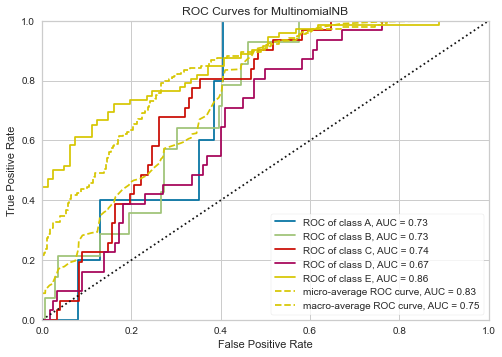





Accuracy of ComplementNB() is 0.49673202614379086
Micro Average Precision Score of the classifier ComplementNB() is 0.49673202614379086
Macro Average Precision Score of the classifier ComplementNB() is 0.3139426655216129
Micro Average Recall Score of the classifier ComplementNB() is 0.49673202614379086
Macro Average Recall Score of the classifier ComplementNB() is 0.3154377880184332
Micro Average F1 Score of the classifier ComplementNB() is 0.49673202614379086
Macro Average F1 Score of the classifier ComplementNB() is 0.3084210526315789
Confusion Matrix of ComplementNB() is 
 [[ 0  0  4  0  1]
 [ 0  3  2  5  4]
 [ 0  3  6 14  8]
 [ 0  4  3 13 11]
 [ 0  1  4 13 54]]
True positive =  0
False positive =  0
False negative =  0
True negative =  3
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\AppData\Local\Temp\ipykernel_27224\1320737536.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


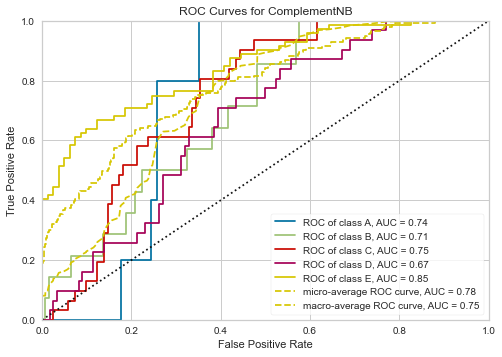

IndexError: index 1 is out of bounds for axis 1 with size 1

In [75]:
from sklearn.preprocessing import MinMaxScaler

df = data4

#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

 

#seperate features from target column
X_d = new_df.drop(columns=[47])
Y_d = new_df[47]

 

X_train, X_test, Y_train, Y_test = train_test_split(X_d, Y_d, test_size=0.25)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_acc = train_test_models1(X_train, Y_train, X_test, Y_test)

Accuracy of MultinomialNB() is 0.5873362445414847
Micro Average Precision Score of the classifier MultinomialNB() is 0.5873362445414847
Macro Average Precision Score of the classifier MultinomialNB() is 0.4285258268301747
Micro Average Recall Score of the classifier MultinomialNB() is 0.5873362445414847
Macro Average Recall Score of the classifier MultinomialNB() is 0.37926978818283164
Micro Average F1 Score of the classifier MultinomialNB() is 0.5873362445414847
Macro Average F1 Score of the classifier MultinomialNB() is 0.3789472171384301
Confusion Matrix of MultinomialNB() is 
 [[  0   5   1   8   0]
 [  0   9   6  20   4]
 [  0   5  15  41  14]
 [  0   2   5  93  38]
 [  0   2   0  38 152]]
True positive =  0
False positive =  5
False negative =  0
True negative =  9
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


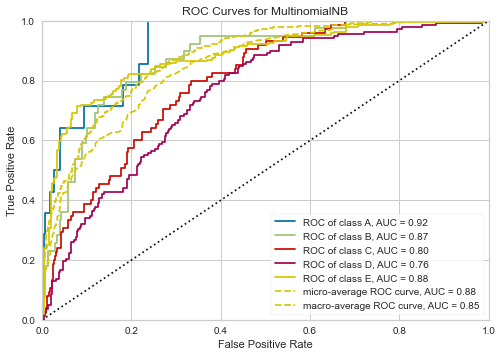





Accuracy of ComplementNB() is 0.5676855895196506
Micro Average Precision Score of the classifier ComplementNB() is 0.5676855895196506
Macro Average Precision Score of the classifier ComplementNB() is 0.3880155611899278
Micro Average Recall Score of the classifier ComplementNB() is 0.5676855895196506
Macro Average Recall Score of the classifier ComplementNB() is 0.4090703734671126
Micro Average F1 Score of the classifier ComplementNB() is 0.5676855895196506
Macro Average F1 Score of the classifier ComplementNB() is 0.3941604431688293
Confusion Matrix of ComplementNB() is 
 [[  0   5   2   5   2]
 [  0  18   9   9   3]
 [  0  12  24  22  17]
 [  0  13  19  63  43]
 [  0   8   7  22 155]]
True positive =  0
False positive =  5
False negative =  0
True negative =  18
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


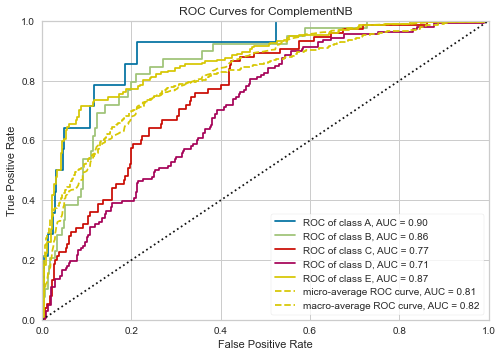





Accuracy of CategoricalNB() is 0.5262008733624454
Micro Average Precision Score of the classifier CategoricalNB() is 0.5262008733624454
Macro Average Precision Score of the classifier CategoricalNB() is 0.4530009619327253
Micro Average Recall Score of the classifier CategoricalNB() is 0.5262008733624454
Macro Average Recall Score of the classifier CategoricalNB() is 0.3900891264532569
Micro Average F1 Score of the classifier CategoricalNB() is 0.5262008733624454
Macro Average F1 Score of the classifier CategoricalNB() is 0.3963583286888297
Confusion Matrix of CategoricalNB() is 
 [[  2   3   1   5   3]
 [  0  14   7  11   7]
 [  0  11  16  25  23]
 [  1  17   9  72  39]
 [  1   8  12  34 137]]
True positive =  2
False positive =  3
False negative =  0
True negative =  14
Sensitivity Score of the classifier is:  0.4
Specificity Score of the classifier is:  1.0


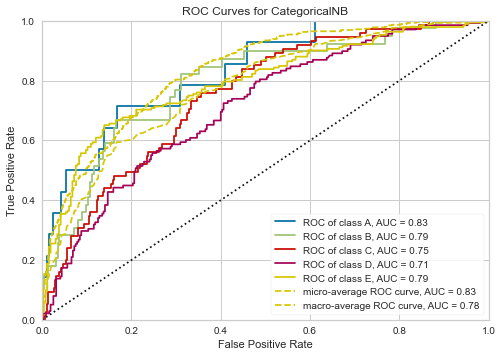

In [76]:
train_acc = train_test_models1(X_train, Y_train, X_train, Y_train)

### K means

In [166]:
y = np.array(Y_train)
y_t = np.array(Y_test)

In [167]:
from sklearn.cluster import KMeans 

In [168]:
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)
# kmeans.fit(X_s)
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=30, random_state=None)
kmeans.fit(X_s)

KMeans(max_iter=500, n_clusters=5, n_init=30)

In [169]:
# correct = 0
# for i in range(len(X_t)):
#     X_array = np.array(X_t[i].astype(float))
#     X_array = X_array.reshape(-1, len(X_array))
#     prediction = kmeans.predict(X_array)
#     if prediction[0] == y_t[i]:
#         correct += 1

# print(correct/len(X_t)) # accuracy

In [170]:
y_pred = kmeans.fit_predict(X_t)
y

array([4, 4, 3, 1, 4, 3, 4, 2, 4, 4, 3, 2, 3, 1, 3, 3, 3, 1, 4, 3, 4, 2,
       3, 4, 3, 3, 4, 2, 3, 4, 2, 3, 2, 4, 2, 1, 4, 4, 4, 2, 3, 1, 3, 3,
       4, 3, 4, 1, 4, 4, 4, 2, 2, 4, 2, 3, 4, 4, 2, 4, 3, 4, 0, 0, 2, 4,
       3, 3, 3, 4, 4, 2, 4, 4, 3, 3, 2, 4, 3, 3, 2, 3, 4, 2, 2, 2, 2, 4,
       3, 4, 4, 4, 4, 3, 4, 3, 4, 0, 2, 4, 4, 3, 3, 1, 1, 3, 4, 2, 3, 3,
       4, 2, 1, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 1, 4, 2, 0, 4, 2, 4, 0, 4,
       2, 4, 1, 3, 4, 2, 4, 2, 4, 4, 3, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 2,
       3, 2, 3, 4, 4, 3, 4, 3, 1, 4, 3, 3, 4, 2, 2, 2, 0, 3, 1, 1, 1, 4,
       3, 1, 2, 4, 4, 3, 4, 1, 4, 4, 4, 4, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2,
       1, 2, 3, 3, 4, 4, 3, 3, 4, 0, 3, 3, 3, 4, 3, 1, 2, 4, 1, 4, 1, 2,
       4, 4, 0, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 2, 4, 3, 2, 0, 2, 2, 4, 2,
       4, 2, 4, 4, 1, 3, 2, 2, 4, 1, 4, 4, 4, 2, 3, 3, 1, 1, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 2, 3, 4, 3, 2, 4, 4, 3, 4, 4, 4, 2, 3, 4, 4, 3, 3,
       3, 3, 3, 2, 4, 4, 4, 4, 3, 4, 0, 2, 3, 4, 3,

In [171]:
l = kmeans.labels_
l

array([4, 1, 1, 1, 4, 0, 3, 2, 4, 3, 2, 3, 0, 1, 1, 0, 3, 1, 1, 2, 3, 2,
       2, 1, 2, 3, 1, 1, 4, 0, 4, 2, 1, 2, 1, 0, 2, 2, 3, 2, 0, 4, 4, 0,
       3, 0, 4, 2, 3, 2, 2, 0, 1, 3, 0, 2, 1, 0, 4, 2, 1, 2, 2, 0, 0, 4,
       2, 1, 0, 0, 1, 0, 1, 1, 1, 4, 1, 0, 2, 4, 2, 3, 1, 0, 3, 3, 3, 1,
       4, 1, 2, 3, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 0,
       4, 1, 2, 4, 4, 2, 4, 0, 3, 1, 1, 1, 2, 1, 0, 0, 3, 1, 1, 0, 2, 3,
       4, 3, 1, 2, 0, 1, 1, 2, 4, 1, 1, 0, 2, 0, 1, 0, 3, 2, 0, 0, 3])

In [172]:
y_t

array([4, 4, 3, 4, 4, 1, 4, 0, 4, 4, 2, 4, 2, 3, 3, 3, 4, 4, 4, 0, 4, 0,
       3, 4, 4, 4, 4, 4, 4, 1, 2, 3, 0, 3, 2, 2, 4, 3, 4, 4, 1, 4, 4, 4,
       4, 2, 2, 4, 4, 4, 2, 1, 4, 4, 1, 3, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4,
       3, 2, 3, 3, 4, 4, 2, 4, 2, 3, 2, 3, 2, 4, 4, 3, 4, 2, 2, 1, 1, 4,
       4, 2, 4, 4, 2, 1, 2, 4, 4, 4, 1, 4, 2, 1, 4, 3, 4, 3, 2, 4, 2, 2,
       4, 3, 4, 4, 4, 3, 3, 3, 4, 1, 2, 2, 0, 3, 4, 3, 3, 2, 4, 4, 3, 4,
       4, 4, 1, 3, 2, 4, 3, 2, 4, 4, 4, 2, 2, 2, 3, 4, 4, 3, 4, 4, 3])

In [173]:
# print(np.sum(l==y)/len(l))
acc = sklearn.metrics.accuracy_score(y_t,y_pred) 
print(acc)

0.1895424836601307


In [174]:
kmeans.cluster_centers_

array([[ 3.22222222e-01,  1.98148148e-01,  8.33333333e-02,
         8.33333333e-02,  8.33333333e-02,  6.38888889e-01,
         1.11111111e-01,  1.66666667e-01,  1.38888889e-01,
         3.05555556e-01,  2.77777778e-01,  1.11111111e-01,
         3.61111111e-01,  3.05555556e-01,  8.33333333e-02,
         2.50000000e-01, -5.55111512e-17,  1.00000000e+00,
        -1.38777878e-17,  2.50000000e-01,  2.50000000e-01,
         7.50000000e-01,  3.61111111e-01,  9.72222222e-01,
         8.33333333e-02,  7.77777778e-01,  8.33333333e-02,
         5.83333333e-01,  8.61111111e-01,  9.72222222e-01,
         8.33333333e-01,  3.05555556e-01,  6.87500000e-01,
         6.94444444e-01,  7.40740741e-02,  3.88888889e-01,
         4.62962963e-02,  7.50000000e-01,  5.55555556e-01,
         5.41666667e-01,  9.72222222e-02,  2.91666667e-01,
         6.87500000e-01,  4.91452991e-01,  5.25462963e-01,
         4.76851852e-01,  5.26190476e-01],
       [ 3.72727273e-01,  2.27272727e-01,  2.22044605e-16,
         2.27

### Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_train)
labels = gmm.predict(X_train)
labels

In [ ]:
gmm.converged_

In [ ]:
gmm.n_iter_

In [ ]:
l = gmm.predict(X_train) 

print(np.sum(l==y)/len(l))
acc = sklearn.metrics.accuracy_score(y,l)
print(acc)

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=l, s=40, cmap='viridis');

In [ ]:
p = gmm.predict_proba(X_train)
p

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

metrics.silhouette_score(X_train,l)

## Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# data = list(zip(X_d, Y_d))

# linkage_data = linkage(data, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# # The vertical line with maximum distance is the blue line, so the threshold is 70
# plt.axhline(y=70, color='b', linestyle='--')

# plt.show()

plt.figure(figsize=(13, 7))

clusters = shc.linkage(new_df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)

# The vertical line with maximum distance is the blue line, so the threshold is 100

plt.axhline(y = 100, color = 'r', linestyle = '-')

In [ ]:
# After locating the horizontal line, we count how many times our vertical lines were crossed by it - 2 times
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(new_df)

In [ ]:
plt.figure(figsize=(7, 4))  
plt.scatter(new_df[0], new_df[1], c=cluster.labels_, cmap='viridis') 